<a href="https://colab.research.google.com/github/ArchitTheCoder/C113/blob/main/C112_DataStory1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Archit")

Archit


In [ ]:
from google.colab import files
data_upload = files.upload()

Saving C113.csv to C113.csv


In [ ]:
import plotly.express as px
import statistics
import pandas as pd
import csv

In [ ]:
df = pd.read_csv("C113.csv")
fig = px.scatter(df, y="quant_saved", color="rem_any")
fig.show()

In [ ]:
with open("C113.csv", newline="") as f:
  reader = csv.reader(f)
  data = list(reader)
data.pop(0)
total_entries = len(data)
total_people_given_rem = 0
for i in data:
  if int(i[3]) == 1:
    total_people_given_rem+=1

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=["Reminded", "Not Reminded"], y=[total_people_given_rem, (total_entries-total_people_given_rem)]))
fig.show()

In [ ]:
all_savings = []
for i in data:
  all_savings.append(float(i[0]))
print(f"Mean of savings - {statistics.mean(all_savings)}\nMode of savings - {statistics.mode(all_savings)}\nMedian of savings - {statistics.median(all_savings)}")

Mean of savings - 85.32780331328739
Mode of savings - 0.0
Median of savings - 39.2724


In [ ]:
reminded_savings = []
not_reminded_savings = []
for i in data:
  if int(i[3]) == 1:
    reminded_savings.append(float(i[0]))
  else:
    not_reminded_savings.append(float(i[0]))

print("Result for people who were reminded to save: ")
print(f"Mean of savings - {statistics.mean(reminded_savings)}\nMode of savings - {statistics.mode(reminded_savings)}\nMedian of savings - {statistics.median(reminded_savings)}")

print("Result for people who were not reminded to save: ")
print(f"Mean of savings - {statistics.mean(not_reminded_savings)}\nMode of savings - {statistics.mode(not_reminded_savings)}\nMedian of savings - {statistics.median(not_reminded_savings)}")


Result for people who were reminded to save: 
Mean of savings - 82.56940908263547
Mode of savings - 0.0
Median of savings - 39.2724
Result for people who were not reminded to save: 
Mean of savings - 89.67095185226523
Mode of savings - 0.0
Median of savings - 36.0475


In [ ]:
print(f"Standard Deviation of All Data -> {statistics.stdev(all_savings)}\nStandard Deviation of Reminded People -> {statistics.stdev(reminded_savings)}\nStandard Deviation of Not Reminded People -> {statistics.stdev(not_reminded_savings)}")

Standard Deviation of All Data -> 196.75453011909315
Standard Deviation of Reminded People -> 173.24866414440817
Standard Deviation of Not Reminded People -> 228.875050299707


In [ ]:
import numpy as np

age = []
savings = []
for i in data:
  if float(i[5]) != 0:
    savings.append(float(i[0]))
    age.append(float(i[5]))
correlation = np.corrcoef(age, savings)
print(f"Correlation Between Age And Amount Saved Is: {correlation[0, 1]}")

Correlation Between Age And Amount Saved Is: 0.03663447975985462


In [ ]:
import plotly.figure_factory as ff
fig = ff.create_distplot([df["quant_saved"].tolist()], ["SAVINGS"], show_hist = False)
fig.show()

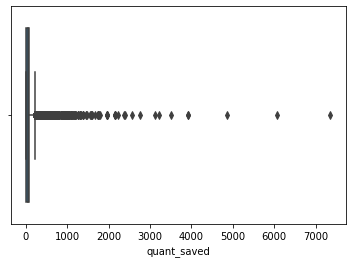

In [ ]:
import seaborn as sns
sns.boxplot(data=df, x=df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1
print("Quartile 1 is {}\nQuartile 3 is {}\n IQR is {}".format(q1, q3, iqr))

Quartile 1 is 2.2840000000000003
Quartile 3 is 86.514
 IQR is 84.22999999999999


In [ ]:
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
print("Lower bound is {}\n Upper bound is {}".format(lower, upper))

Lower bound is -124.06099999999998
 Upper bound is 212.85899999999998


In [ ]:
new_df = df[df["quant_saved"]<upper]
all_savings = new_df["quant_saved"].tolist()
print(f"Mean -> {statistics.mean(all_savings)}\nMedian -> {statistics.median(all_savings)}\nMode -> {statistics.mode(all_savings)}")

Mean -> 46.200519389818794
Median -> 36.0475
Mode -> 0.0


In [ ]:
fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist = False)
fig.show()

In [ ]:
import random

sampling_mean = []

for i in range(1000):
  temp_list = []
  for i in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean.append(statistics.mean(temp_list))
mean_sampling = statistics.mean(sampling_mean)

fig = ff.create_distplot([sampling_mean], ["Sampling Savings"], show_hist = False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0,0.1], mode="lines", name="MEAN"))
fig.show()

In [ ]:
print(f"Standard deviation of the sampling data -> {statistics.stdev(sampling_mean)}")

Standard deviation of the sampling data -> 5.118575804356167


In [ ]:
print(f"Mean of population -> {statistics.mean(all_savings)}\nMean of sampling population -> {mean_sampling}")

Mean of population -> 46.200519389818794
Mean of sampling population -> 46.26437854083409


In [ ]:
import numpy as np

temp_df = new_df[new_df.age != 0]
age = temp_df["age"].tolist()
quant_saved = temp_df["quant_saved"].tolist()


correlation = np.corrcoef(age, quant_saved)
print(correlation[0, 1])

0.08561544120342093


In [ ]:
reminded_df = new_df.loc[new_df["rem_any"] == 1]
not_reminded_df = new_df.loc[new_df["rem_any"] == 0]

print(reminded_df.head())
print(not_reminded_df.head())

   quant_saved  female  highschool_completed  rem_any  wealthy   age
0      13.0908       1                     0        1        0  28.0
1      39.2724       0                     1        1        1   0.0
3      58.9086       1                     1        1        1   0.0
4      78.5448       1                     1        1        1   0.0
5      39.2724       1                     1        1        1  43.0
    quant_saved  female  highschool_completed  rem_any  wealthy   age
11      39.2724       1                     1        0        1  26.0
12      58.9086       1                     1        0        1   0.0
14      78.5448       1                     1        0        0  32.0
31       2.2840       1                     1        0        1  29.0
34       2.2840       1                     1        0        1  28.0


In [ ]:
fig = ff.create_distplot([not_reminded_df["quant_saved"].tolist()], ["Savings"], show_hist = False)
fig.show()

In [ ]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()
sampling_mean_not_rem_list = []

for i in range(1000):
  temp_list = []
  for i in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_not_rem_list.append(statistics.mean(temp_list))
not_rem_mean_sampling = statistics.mean(sampling_mean_not_rem_list)

stdev_not_rem = statistics.stdev(sampling_mean_not_rem_list)

print(f"Not Reminded Mean is {not_rem_mean_sampling}\nStdev is {stdev_not_rem}")
fig = ff.create_distplot([sampling_mean_not_rem_list], ["Sampling Savings"], show_hist = False)
fig.add_trace(go.Scatter(x=[not_rem_mean_sampling, not_rem_mean_sampling], y=[0,0.1], mode="lines", name="MEAN"))
fig.show()


Not Reminded Mean is 44.05734721398806
Stdev is 5.212823317267725


In [ ]:
first_start = not_rem_mean_sampling - stdev_not_rem
first_end = not_rem_mean_sampling + stdev_not_rem

second_start = not_rem_mean_sampling - (2 * stdev_not_rem)
second_end = not_rem_mean_sampling + (2 * stdev_not_rem)

third_start = not_rem_mean_sampling - (3 * stdev_not_rem)
third_end = not_rem_mean_sampling + (3 * stdev_not_rem)

print(f"First start is -> {first_start} | First end is -> {first_end}\nSecond start is -> {second_start} | Second end is -> {second_end}\nThird start is -> {third_start} | third end is -> {third_end}")

First start is -> 38.84452389672033 | First end is -> 49.270170531255786
Second start is -> 33.63170057945261 | Second end is -> 54.482993848523506
Third start is -> 28.418877262184886 | third end is -> 59.69581716579123


In [ ]:
reminded_savings = reminded_df["quant_saved"].tolist()
sampling_mean_rem_list = []

for i in range(1000):
  temp_list = []
  for i in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_rem_list.append(statistics.mean(temp_list))
rem_mean_sampling = statistics.mean(sampling_mean_rem_list)

stdev_rem = statistics.stdev(sampling_mean_rem_list)

print(f"Reminded Mean is {rem_mean_sampling}\nStdev is {stdev_rem}")
fig = ff.create_distplot([sampling_mean_rem_list], ["Sampling Savings"], show_hist = False)
fig.add_trace(go.Scatter(x=[rem_mean_sampling, rem_mean_sampling], y=[0,0.1], mode="lines", name="MEAN"))
fig.show()

Reminded Mean is 47.54012457403375
Stdev is 5.077716547841898


In [ ]:
z_score = (rem_mean_sampling - not_rem_mean_sampling)/(stdev_not_rem)
print(z_score)

0.6681172846409013
